<a href="https://colab.research.google.com/github/PhuongAnh2212/midterm-DSP/blob/main/SER_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install librosa scikit-learn numpy

In [4]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csav)

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import os

In [2]:
import os
import pandas as pd

# Path to SAVEE dataset in your Google Drive
SAVEE_dir = "/content/drive/MyDrive/midtermDSP/SAVEE"

paths, labels = [], []
for dirname, _, filenames in os.walk(SAVEE_dir):
    for filename in filenames:
        # Filter out non-audio files like info.txt
        if filename.endswith('.wav'):  # Assuming audio files are in .wav format
            paths.append(os.path.join(dirname, filename))

            label = filename[::-1].split('_')[0][::-1]

            if label[:1] == 'a':
                labels.append('angry')
            elif label[:1] == 'd':
                labels.append('disgust')
            elif label[:1] == 'f':
                labels.append('fearful')
            elif label[:1] == 'h':
                labels.append('happy')
            elif label[:1] == 'n':
                labels.append('neutral')
            elif label[:1] == 's':
                if label[:2] == 'sa':
                    labels.append('sad')
                else:
                    labels.append('surprised')

# Create a DataFrame to organize paths and labels
SAVEE = pd.DataFrame({'emotions': labels, 'path': paths})

# Display the first few rows to ensure it's correct
SAVEE.head()


,emotions,path
0,angry,/content/drive/MyDrive/midtermDSP/SAVEE/DC_a01...
1,angry,/content/drive/MyDrive/midtermDSP/SAVEE/DC_a12...
2,angry,/content/drive/MyDrive/midtermDSP/SAVEE/DC_a07...
3,angry,/content/drive/MyDrive/midtermDSP/SAVEE/DC_a08...
4,angry,/content/drive/MyDrive/midtermDSP/SAVEE/DC_a03...


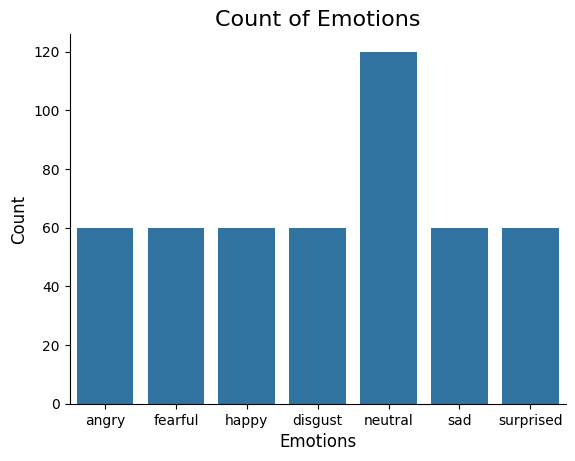

In [5]:
plt.title('Count of Emotions', size=16)
sns.countplot(data=SAVEE, x='emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [6]:
# Initialize an empty DataFrame for TESS
TESS = pd.DataFrame({
    'emotions': [],
    'path': []
})

# Path to TESS dataset in Google Drive
TESS_dir = "/content/drive/MyDrive/midtermDSP/TESS"

# Loop through the TESS dataset directory and extract file paths and emotions
for dirname, _, filenames in os.walk(TESS_dir):
    for filename in filenames:
        # Only process audio files (assuming they're .wav files)
        if filename.endswith('.wav'):
            audio_path = os.path.join(dirname, filename)
            emo = filename.split('_')[-1]
            emo_tag = emo.split('.')[0]

            # Map emotion tags to full emotion names
            if emo_tag == 'fear':
                emo = 'fearful'
            elif emo_tag == 'ps':
                emo = 'surprised'
            elif emo_tag == 'sad':
                emo = 'sad'
            elif emo_tag == 'happy':
                emo = 'happy'
            elif emo_tag == 'neutral':
                emo = 'neutral'
            elif emo_tag == 'angry':
                emo = 'angry'
            elif emo_tag == 'disgust':
                emo = 'disgust'

            # Add the emotion and path to the DataFrame
            new_data = pd.DataFrame({'emotions': [emo], 'path': [audio_path]})
            TESS = pd.concat([TESS, new_data], ignore_index=True)

    # Break early if we reach a dataset size of 2800 as a safeguard
    if len(TESS) == 2800:
        break

# Convert the 'emotions' column to a categorical type
TESS['emotions'] = pd.Categorical(TESS['emotions'])

# Display the first few rows of the DataFrame
TESS.head()

,emotions,path
0,sad,/content/drive/MyDrive/midtermDSP/TESS/OAF_Sad...
1,sad,/content/drive/MyDrive/midtermDSP/TESS/OAF_Sad...
2,sad,/content/drive/MyDrive/midtermDSP/TESS/OAF_Sad...
3,sad,/content/drive/MyDrive/midtermDSP/TESS/OAF_Sad...
4,sad,/content/drive/MyDrive/midtermDSP/TESS/OAF_Sad...


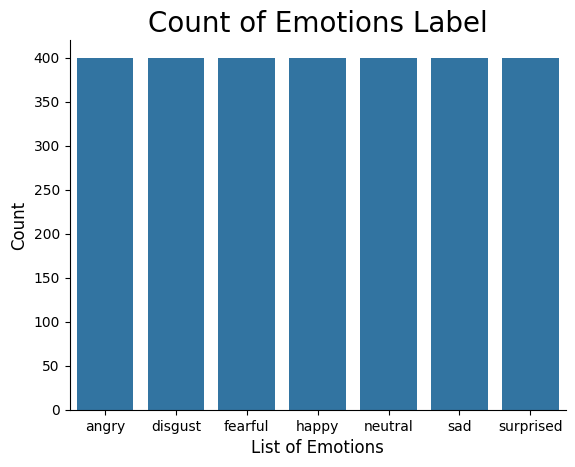

In [7]:
plt.title ("Count of Emotions Label",fontsize = 20)
sns.countplot (data=TESS, x ='emotions')
plt.xlabel ('List of Emotions',fontsize = 12)
plt.ylabel ('Count',fontsize = 12)
sns.despine (top=True, right = True,left =False,bottom=False)
plt.show ()

In [8]:
# Initialize the DataFrame
Ravdess = pd.DataFrame({
    'emotions': [],
    'path': []
})

scaler = MinMaxScaler(feature_range=(0, 1))

Ravdess_dir = "/content/drive/MyDrive/midtermDSP/RADVESS"
for dir in os.listdir(Ravdess_dir):
    # Construct full path to the directory
    dir_path = os.path.join(Ravdess_dir, dir)
    # Ensure it's a directory
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            # Check for valid audio file extensions
            if file.endswith(('.wav', '.mp3')):  # Add any other audio formats you expect
                audio_path = os.path.join(dir_path, file)
                id_arr = file.split('-')
                emo_id = id_arr[2]
                if emo_id == '01':
                    emo = 'neutral'
                elif emo_id == '02':
                    emo = 'calm'
                elif emo_id == '03':
                    emo = 'happy'
                elif emo_id == '04':
                    emo = 'sad'
                elif emo_id == '05':
                    emo = 'angry'
                elif emo_id == '06':
                    emo = 'fearful'
                elif emo_id == '07':
                    emo = 'disgust'
                else:
                    emo = 'surprised'
                new_data = pd.DataFrame({'emotions': [emo], 'path': [audio_path]})
                Ravdess = pd.concat([Ravdess, new_data], ignore_index=True)

Ravdess['emotions'] = pd.Categorical(Ravdess['emotions'])
print(Ravdess)

       emotions                                               path
0       neutral  /content/drive/MyDrive/midtermDSP/RADVESS/Acto...
1          calm  /content/drive/MyDrive/midtermDSP/RADVESS/Acto...
2          calm  /content/drive/MyDrive/midtermDSP/RADVESS/Acto...
3         happy  /content/drive/MyDrive/midtermDSP/RADVESS/Acto...
4         happy  /content/drive/MyDrive/midtermDSP/RADVESS/Acto...
...         ...                                                ...
1446    neutral  /content/drive/MyDrive/midtermDSP/RADVESS/Acto...
1447  surprised  /content/drive/MyDrive/midtermDSP/RADVESS/Acto...
1448       calm  /content/drive/MyDrive/midtermDSP/RADVESS/Acto...
1449       calm  /content/drive/MyDrive/midtermDSP/RADVESS/Acto...
1450       calm  /content/drive/MyDrive/midtermDSP/RADVESS/Acto...

[1451 rows x 2 columns]


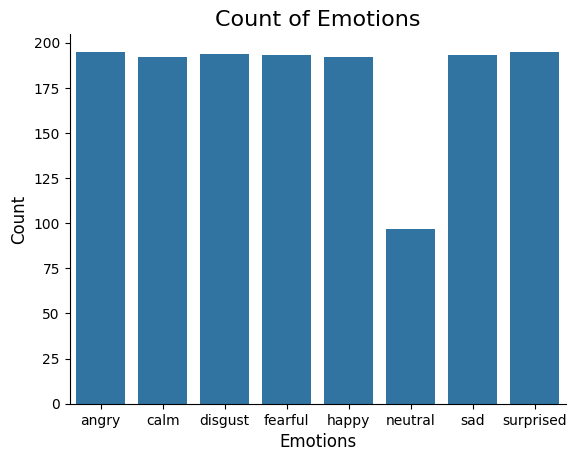

In [9]:
plt.title('Count of Emotions', size=16)
sns.countplot(data=Ravdess, x='emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [10]:
def create_wave_plot (data_path, emo):
    audio, sr = librosa.load(data_path)
    plt.figure(figsize=(10,3))
    plt.title(f'Waveplot for audio with {emo} emotion', size=16)
    librosa.display.waveshow(audio, sr=sr)
    plt.show()

def show_melspectrogram (data_path, emo):
    S_db, sr = create_melspectrogram (data_path)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, y_axis='mel', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for audio with {emo} emotion')
    plt.tight_layout()
    plt.show()

def create_melspectrogram (data_path):
    audio, sr = librosa.load(data_path, sr=22050)
    n_frames = int(sr*1.2)
    start_frame = int(len(audio) // 2 - n_frames // 2)
    end_frame = start_frame + n_frames
    audio_cut = audio[start_frame:end_frame]
    S = librosa.feature.melspectrogram(y=audio_cut, sr=sr, n_mels=128, n_fft=1024, hop_length=512)
    S_db =librosa.power_to_db(S, ref=np.min)
    return S_db, sr

def create_mfcc (audio, sr):
    n_frames = int(sr*1.2)
    start_frame = int(len(audio) // 2 - n_frames // 2)
    end_frame = start_frame + n_frames
    audio_cut = audio[start_frame:end_frame]
    feature = np.mean(librosa.feature.mfcc(y=audio_cut,sr=sr,n_mfcc=40).T,axis=0)
    return feature

def create_origin_mfcc (data_path):
    S, sr = librosa.load(data_path)
    feature = create_mfcc(S,sr)
    return feature

def create_noise_mfcc (data_path):
    S, sr = librosa.load(data_path)
    noise_amp = 0.035*np.random.uniform()*np.amax(S)
    S = S + noise_amp*np.random.normal(size=S.shape[0])
    feature = create_mfcc(S,sr)
    return feature

def create_pitch_mfcc (data_path):
    S, sr = librosa.load(data_path)
    S = librosa.effects.pitch_shift(y=S, sr=sr, n_steps=0.7)
    feature = create_mfcc(S,sr)
    return feature

def create_stretch_mfcc (data_path):
    S, sr = librosa.load(data_path)
    S = librosa.effects.time_stretch(y=S, rate=0.85)
    feature = create_mfcc(S,sr)
    return feature

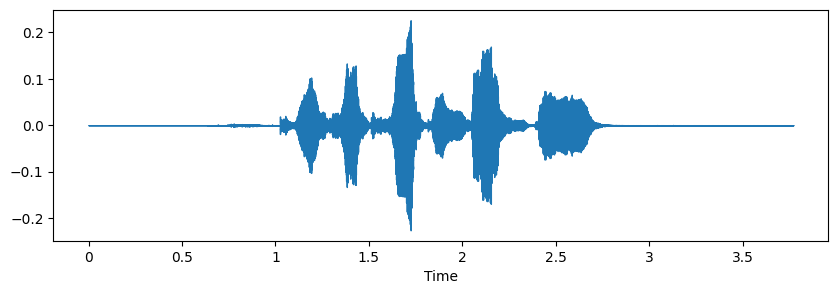

In [11]:
path_happy = np.array(Ravdess.path[Ravdess.emotions=='happy'])[1]
S, sr = librosa.load(path_happy)
plt.figure(figsize=(10,3))
librosa.display.waveshow(S, sr=sr)
plt.show()

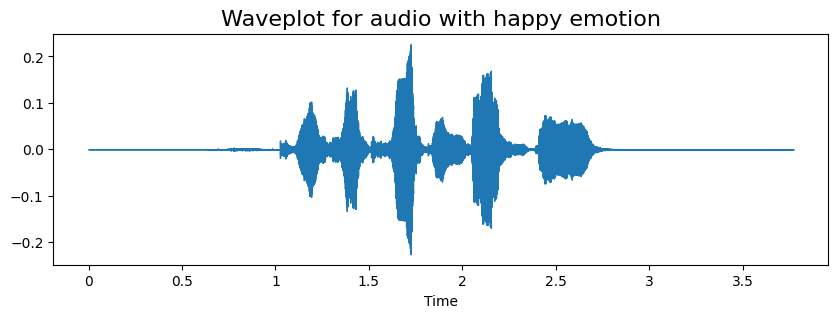

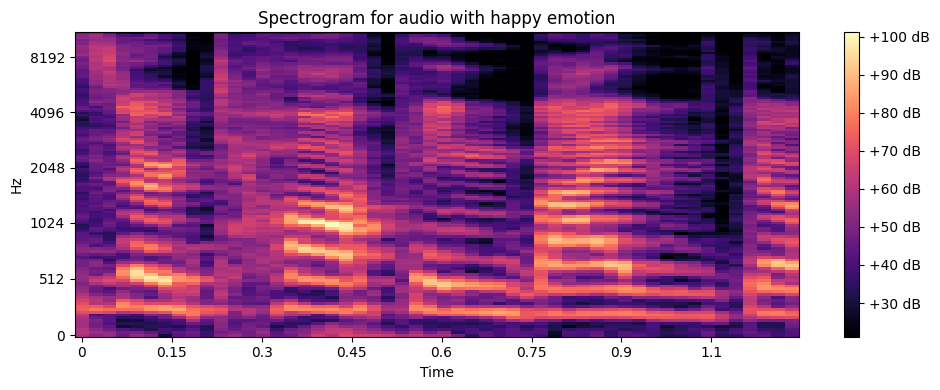

In [12]:
path_happy = np.array(Ravdess.path[Ravdess.emotions=='happy'])[1]
create_wave_plot(path_happy, 'happy')
show_melspectrogram(path_happy, 'happy')

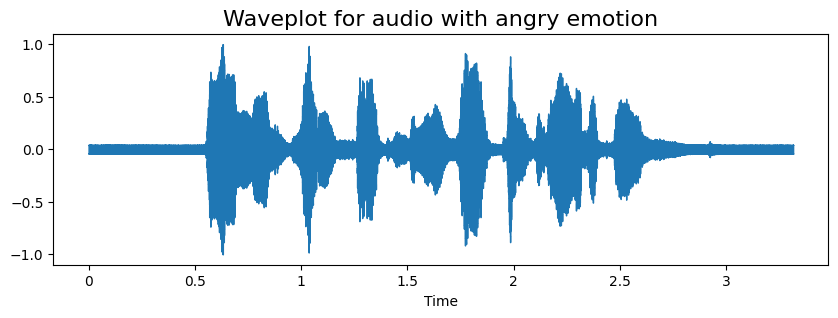

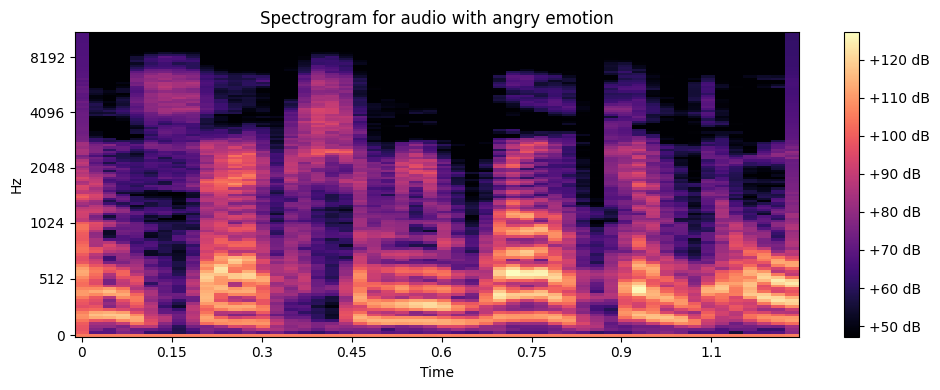

In [13]:
path_angry = np.array(SAVEE.path[SAVEE.emotions=='angry'])[1]
create_wave_plot(path_angry, 'angry')
show_melspectrogram(path_angry, 'angry')

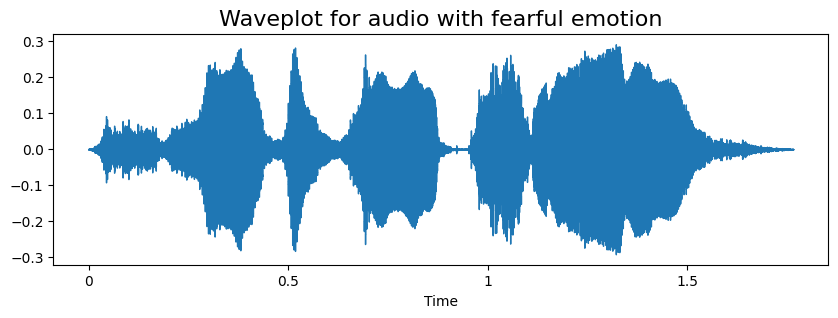

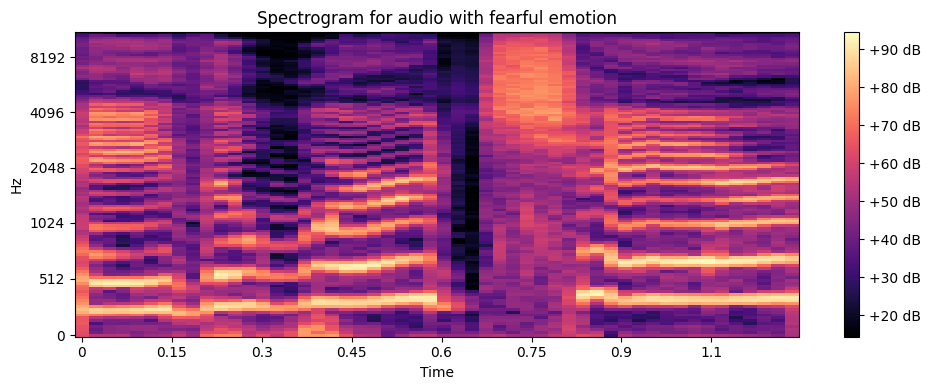

In [14]:
path_fearful = np.array (TESS.path[TESS.emotions=='fearful'])[1]
create_wave_plot (path_fearful, 'fearful')
show_melspectrogram (path_fearful, 'fearful')

### Concat dataset

In [15]:
df = pd.concat([Ravdess, SAVEE, TESS], axis=0, ignore_index=True)
df = df[df['emotions'] != 'calm']

In [16]:
groups = df.groupby('emotions')
groups.size()

,0
emotions,
angry,655
disgust,654
fearful,653
happy,652
neutral,617
sad,653
surprised,655


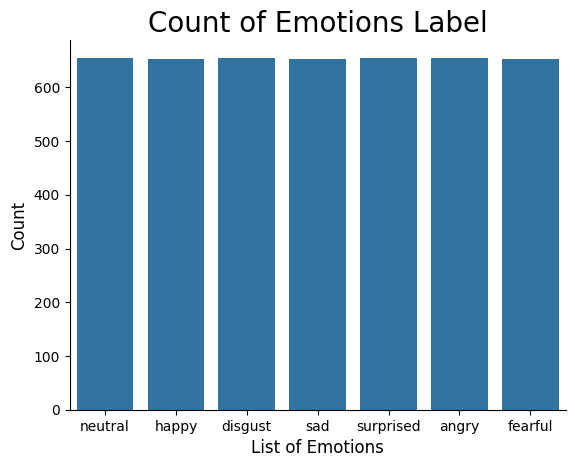

In [17]:
#Sinh thêm dữ liệu với nhãn neutral
neutral_df = df[df['emotions'] == 'neutral']
random_neutral = neutral_df.sample (n=groups.size().max()-groups.size().min())
df = pd.concat([df,random_neutral],ignore_index=True)
plt.title ("Count of Emotions Label",fontsize = 20)
sns.countplot (data=df, x ='emotions')
plt.xlabel ('List of Emotions',fontsize = 12)
plt.ylabel ('Count',fontsize = 12)
sns.despine (top=True, right = True,left =False,bottom=False)
plt.show ()

In [18]:
origin = df['path'].apply(lambda x:create_origin_mfcc(x))
noise = df['path'].apply(lambda x:create_noise_mfcc(x))
pitch = df['path'].apply(lambda x:create_pitch_mfcc(x))
stretch = df['path'].apply(lambda x:create_stretch_mfcc(x))

In [19]:
ohe= OneHotEncoder()
y1 = ohe.fit_transform( df[['emotions']] )
y1 = y1.toarray()
y2 = ohe.fit_transform( df[['emotions']] )
y2 = y2.toarray()
y3 = ohe.fit_transform( df[['emotions']] )
y3 = y3.toarray()
y4 = ohe.fit_transform( df[['emotions']] )
y4 = y4.toarray()
mfcc_data = np.concatenate([origin, noise, pitch, stretch])
y = np.concatenate([y1,y2,y3,y4])
y.shape

(18308, 7)

In [20]:
X = [x for x in mfcc_data]
X = np.array(X)
X.shape

(18308, 40)

In [21]:
y_label = list ()
for i in range (len(y)):
    if y[i][0] == 1.0:
        y_label.append ('angry')
    elif y[i][1] == 1.0:
        y_label.append ('disgust')
    elif y[i][2] == 1.0:
        y_label.append ('fearful')
    elif y[i][3] == 1.0:
        y_label.append ('happy')
    elif y[i][4] == 1.0:
        y_label.append ('neutral')
    elif y[i][5] == 1.0:
        y_label.append ('sad')
    elif y[i][6] == 1.0:
        y_label.append ('suprised')

y_trans = np.array (y_label)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y_trans,test_size=0.2,random_state=42)

In [23]:
#Train model using SVM
model_SVM = SVC (C=1.0,kernel='rbf',random_state=42)
model_SVM.fit (X_train,y_train)

y_pred = model_SVM.predict (X_test)

print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.69      0.73      0.71       555
     disgust       0.59      0.75      0.66       540
     fearful       0.83      0.70      0.76       509
       happy       0.71      0.58      0.64       529
     neutral       0.78      0.78      0.78       533
         sad       0.75      0.70      0.72       476
    suprised       0.66      0.69      0.67       520

    accuracy                           0.71      3662
   macro avg       0.71      0.70      0.71      3662
weighted avg       0.71      0.71      0.71      3662



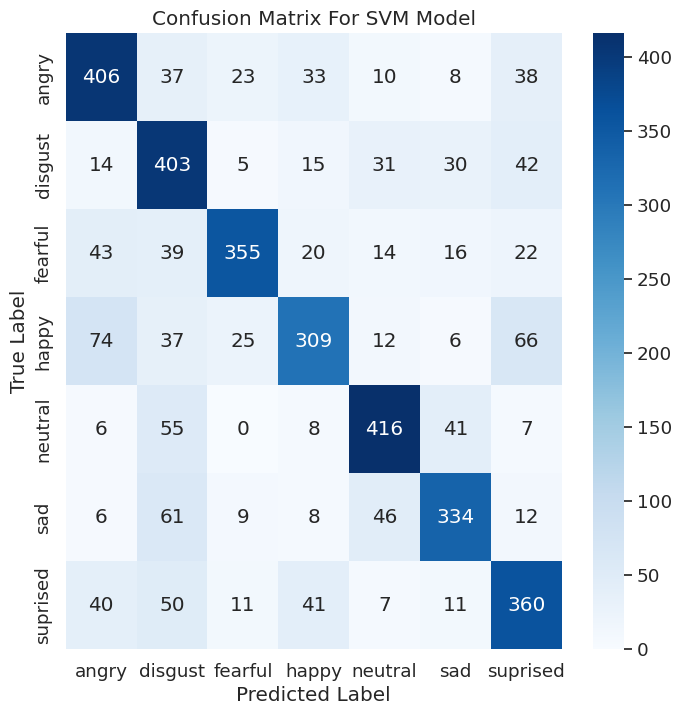

In [24]:
result_cf = confusion_matrix (y_test,y_pred)
sns.set (font_scale=1.2)
plt.figure(figsize=(8,8))
label_name = np.unique(y_test)
sns.heatmap (result_cf,annot=True,cmap='Blues',fmt='g',xticklabels=label_name, yticklabels=label_name)
sns.set (font_scale=1.2)

plt.title ('Confusion Matrix For SVM Model')
plt.xlabel ('Predicted Label')
plt.ylabel ('True Label')
plt.show ()